# Predicting daily sales (Rossmann store sales)

In [34]:
# Import tools: pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=4)
plt.style.use("fivethirtyeight")
plt.rcParams['figure.figsize'] = [10, 7]

In [35]:
# Read data
sales = pd.read_csv('./train.csv')

In [36]:
# Show first 5 rows
sales.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [37]:
# This is a time series dataset so we need Convert "Date" column to datetime64 type
# and use this column as index later
# Hint: pd.to_datetime
sales['Date'] = pd.to_datetime(sales['Date'], format="%Y-%m-%d")

In [38]:
# Show first 5 rows again
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## 2. Exploratory Data Analysis

In [39]:
# Show brief info of our dataset
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [40]:
# Check for null value
sales.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [41]:
# Get statical view of our dataset
sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


# 3. Preprocessing

In [42]:
# Set date as index
sales = sales.set_index('Date')

# Sort data base on index
sales.sort_index(inplace=True)

# group our data with "pd.Grouper(freq='M')" and sum
# save result in sales_m
sales_m = sales.groupby([pd.Grouper(freq='M')]).sum()

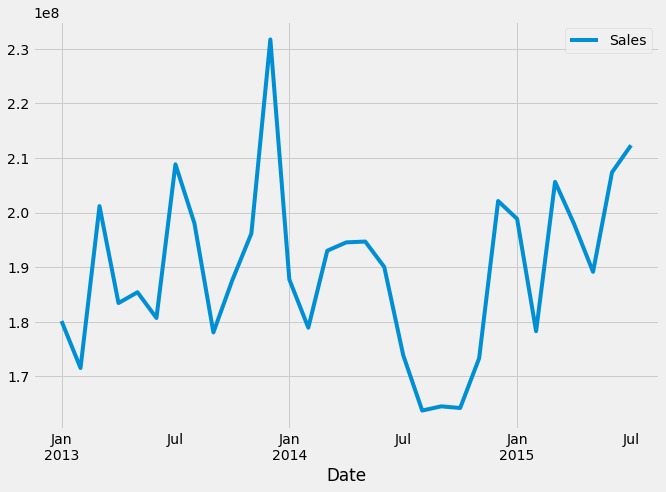

In [43]:
# Let's see how Sales series look like
sales_m.plot(y=['Sales'])

### **Objective**: Predict total sales 6 weeks in advance for the entire company.

In [44]:
# Take a look at sales_m
sales_m.head()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Date,,,,,,,
2013-01-31,19286282,134913,180132207,20380423,28869,11150,5115
2013-02-28,17420760,124880,171534275,19244468,26683,11150,2676
2013-03-31,19287270,144950,201180369,21969462,27892,16725,5689
2013-04-30,18665100,128225,183431432,20882365,27880,13380,5319
2013-05-31,19287270,138260,185411063,20723886,26202,14495,3774


 #Open 0 = closed, 1 = open
 #Promo: indicates whether a store is running a promo on that day.
 #StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.
 #SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools.

Which is the column we gonna predict using date

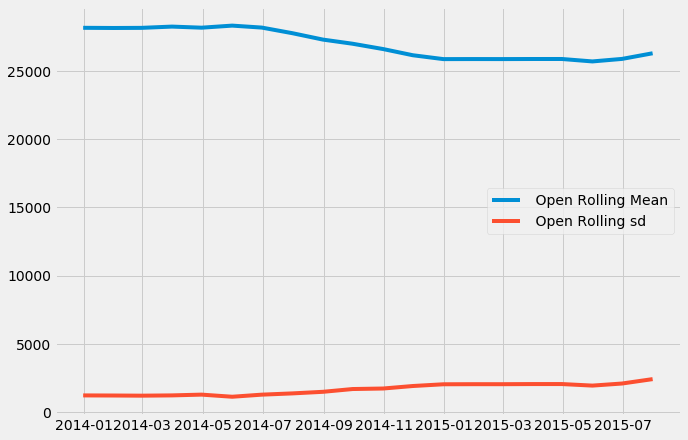

In [45]:
plt.plot(sales_m.Open.rolling(window=12).mean(), label=' Open Rolling Mean');
plt.plot(sales_m.Open.rolling(window=12).std(), label=" Open Rolling sd");
plt.legend();

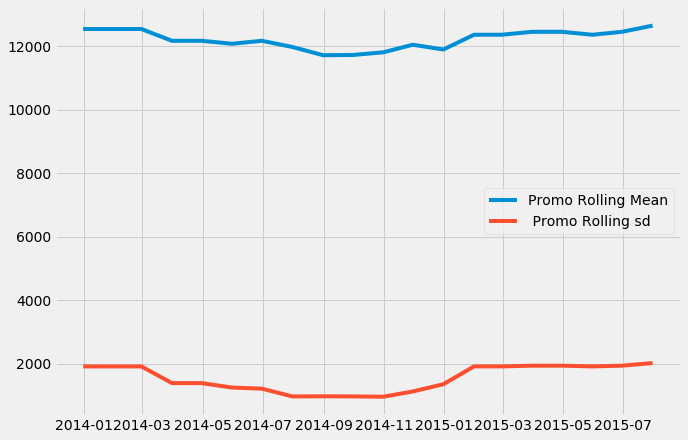

In [46]:
plt.plot(sales_m.Promo.rolling(window=12).mean(), label='Promo Rolling Mean');
plt.plot(sales_m.Promo.rolling(window=12).std(), label=" Promo Rolling sd");
plt.legend();

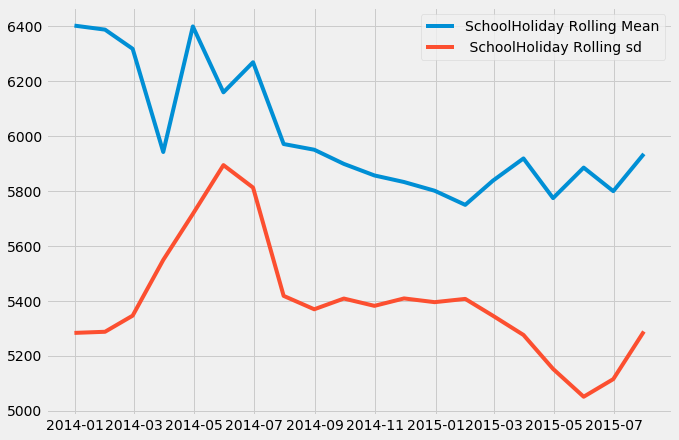

In [47]:
plt.plot(sales_m.SchoolHoliday.rolling(window=12).mean(), label='SchoolHoliday Rolling Mean');
plt.plot(sales_m.SchoolHoliday.rolling(window=12).std(), label=" SchoolHoliday Rolling sd");
plt.legend();

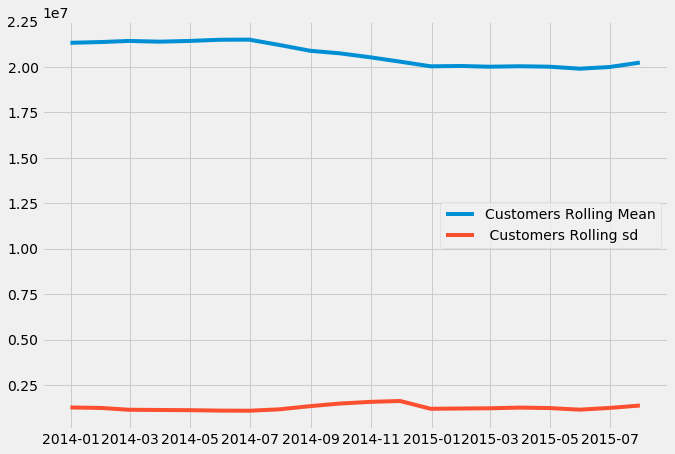

In [48]:
plt.plot(sales_m.Customers.rolling(window=12).mean(), label='Customers Rolling Mean');
plt.plot(sales_m.Customers.rolling(window=12).std(), label=" Customers Rolling sd");
plt.legend();

In [49]:
# Open is the column we gonna predict using date

# Decomposing Time Series


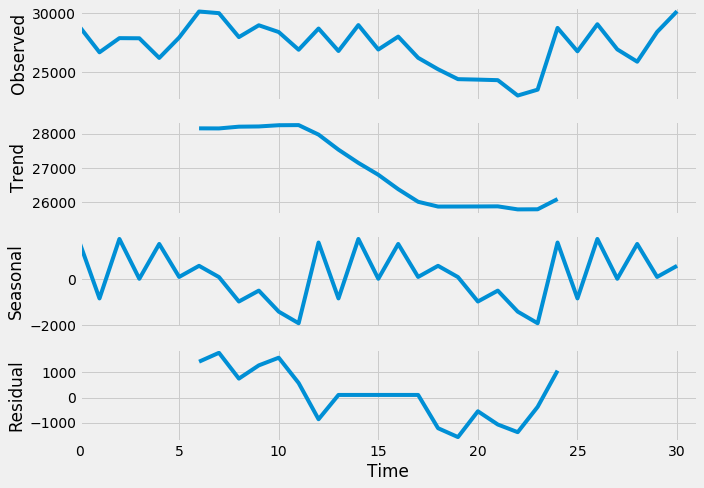

In [50]:
# Import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose Open with freq=12, model='additive'
res = seasonal_decompose(sales_m.Open.values,freq=12,model="additive")
fig = res.plot();

# Stationarity tests


In [51]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [52]:
# Let's test with original timeseries
test_stationarity(sales_m.Open.values)

Results of Dickey-Fuller Test:
Test Statistic                 -2.765232
p-value                         0.063414
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [53]:
# How about we try to de seasonalization our series
# Using diff with periods is 7, the same with season that we can capture from figure
test_stationarity(sales_m.Open.diff(7).dropna().values)

Results of Dickey-Fuller Test:
Test Statistic                 -1.251339
p-value                         0.651131
#Lags Used                      0.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


In [54]:
# Let use diff series with periods is 6 for further steps. Save results in "ts" variable
ts = sales_m.Open.diff(7).dropna()

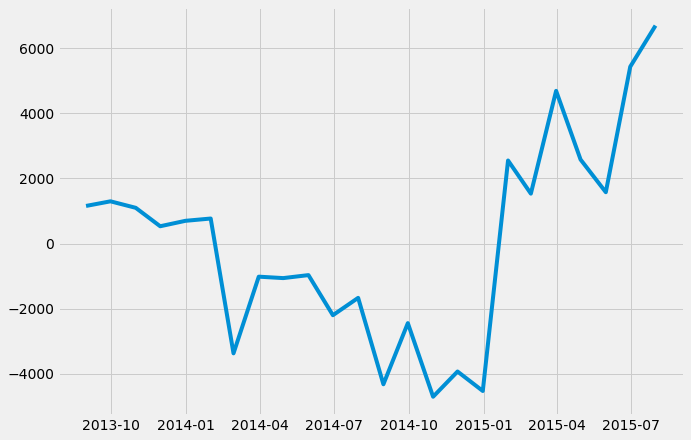

In [55]:
# Let plot and take a look at our series after de-seasonalization
plt.plot(ts);

# 4. Modelling


In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import probplot

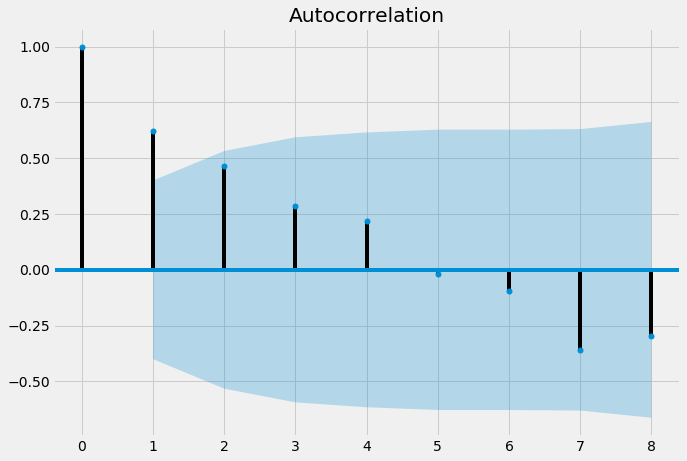

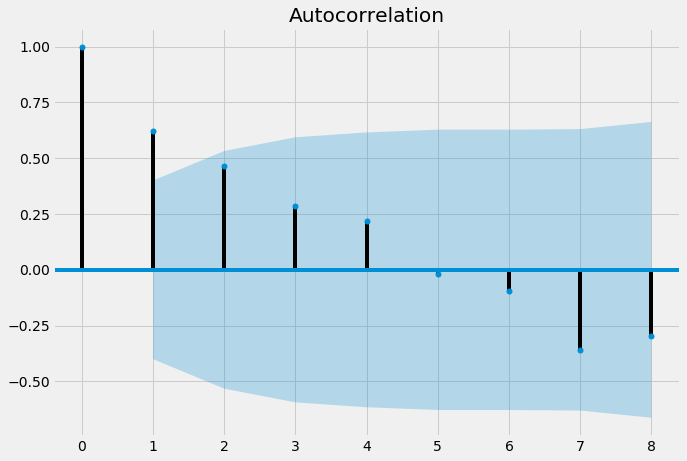

In [57]:
plot_acf(ts, lags=8, alpha=0.05)

In [58]:
from statsmodels.tsa.arima_model import ARMA
best_aic = np.inf
best_order = None
best_model = None

rng = range(5)
for i in rng:
    for j in rng:
        if i == j == 0:
            continue
        try:
            model = ARMA(ts, order=(i, j)).fit(method='mle', trend='nc')
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (i, j)
                best_model = model
        except: continue
print('AIC: {:6.5} | order: {}'.format(best_aic, best_order))

AIC: 442.36 | order: (1, 0)


## 5. Summary

In [59]:
predict = best_model.predict(start=0, end=25)

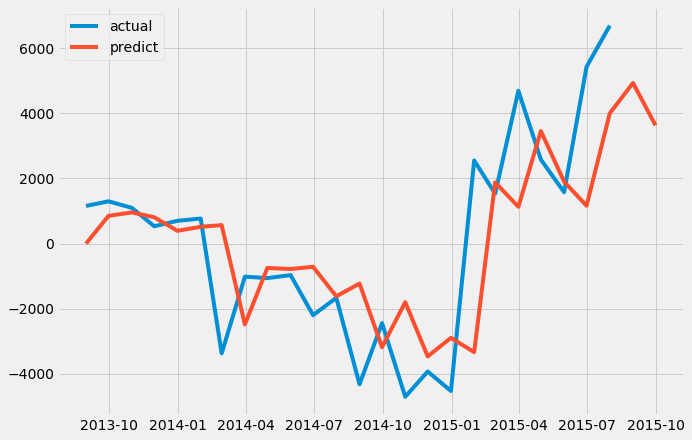

In [60]:
plt.plot(ts, label='actual');
plt.plot(predict, label='predict');
plt.legend()

In [61]:
predict.tail(2)

2015-08-31    4932.785461
2015-09-30    3633.866846
Freq: M, dtype: float64